In [1]:
import scipy
import numpy
import sklearn
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn import tree
from sklearn import metrics

# Dataset clustering using hierachical agglomerative clustering

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
classes = df.species
objects = df.drop(['species'],axis=1)

In [4]:
# Perform a hierarchical clustering

# compute the aggregation tree (but not the clusters)
Z = sch.linkage(objects, method='complete', metric='euclidean')

In [5]:
# Z is an array containg information about the grouping made
print(type(Z))
print(Z.shape)

<class 'numpy.ndarray'>
(149, 4)


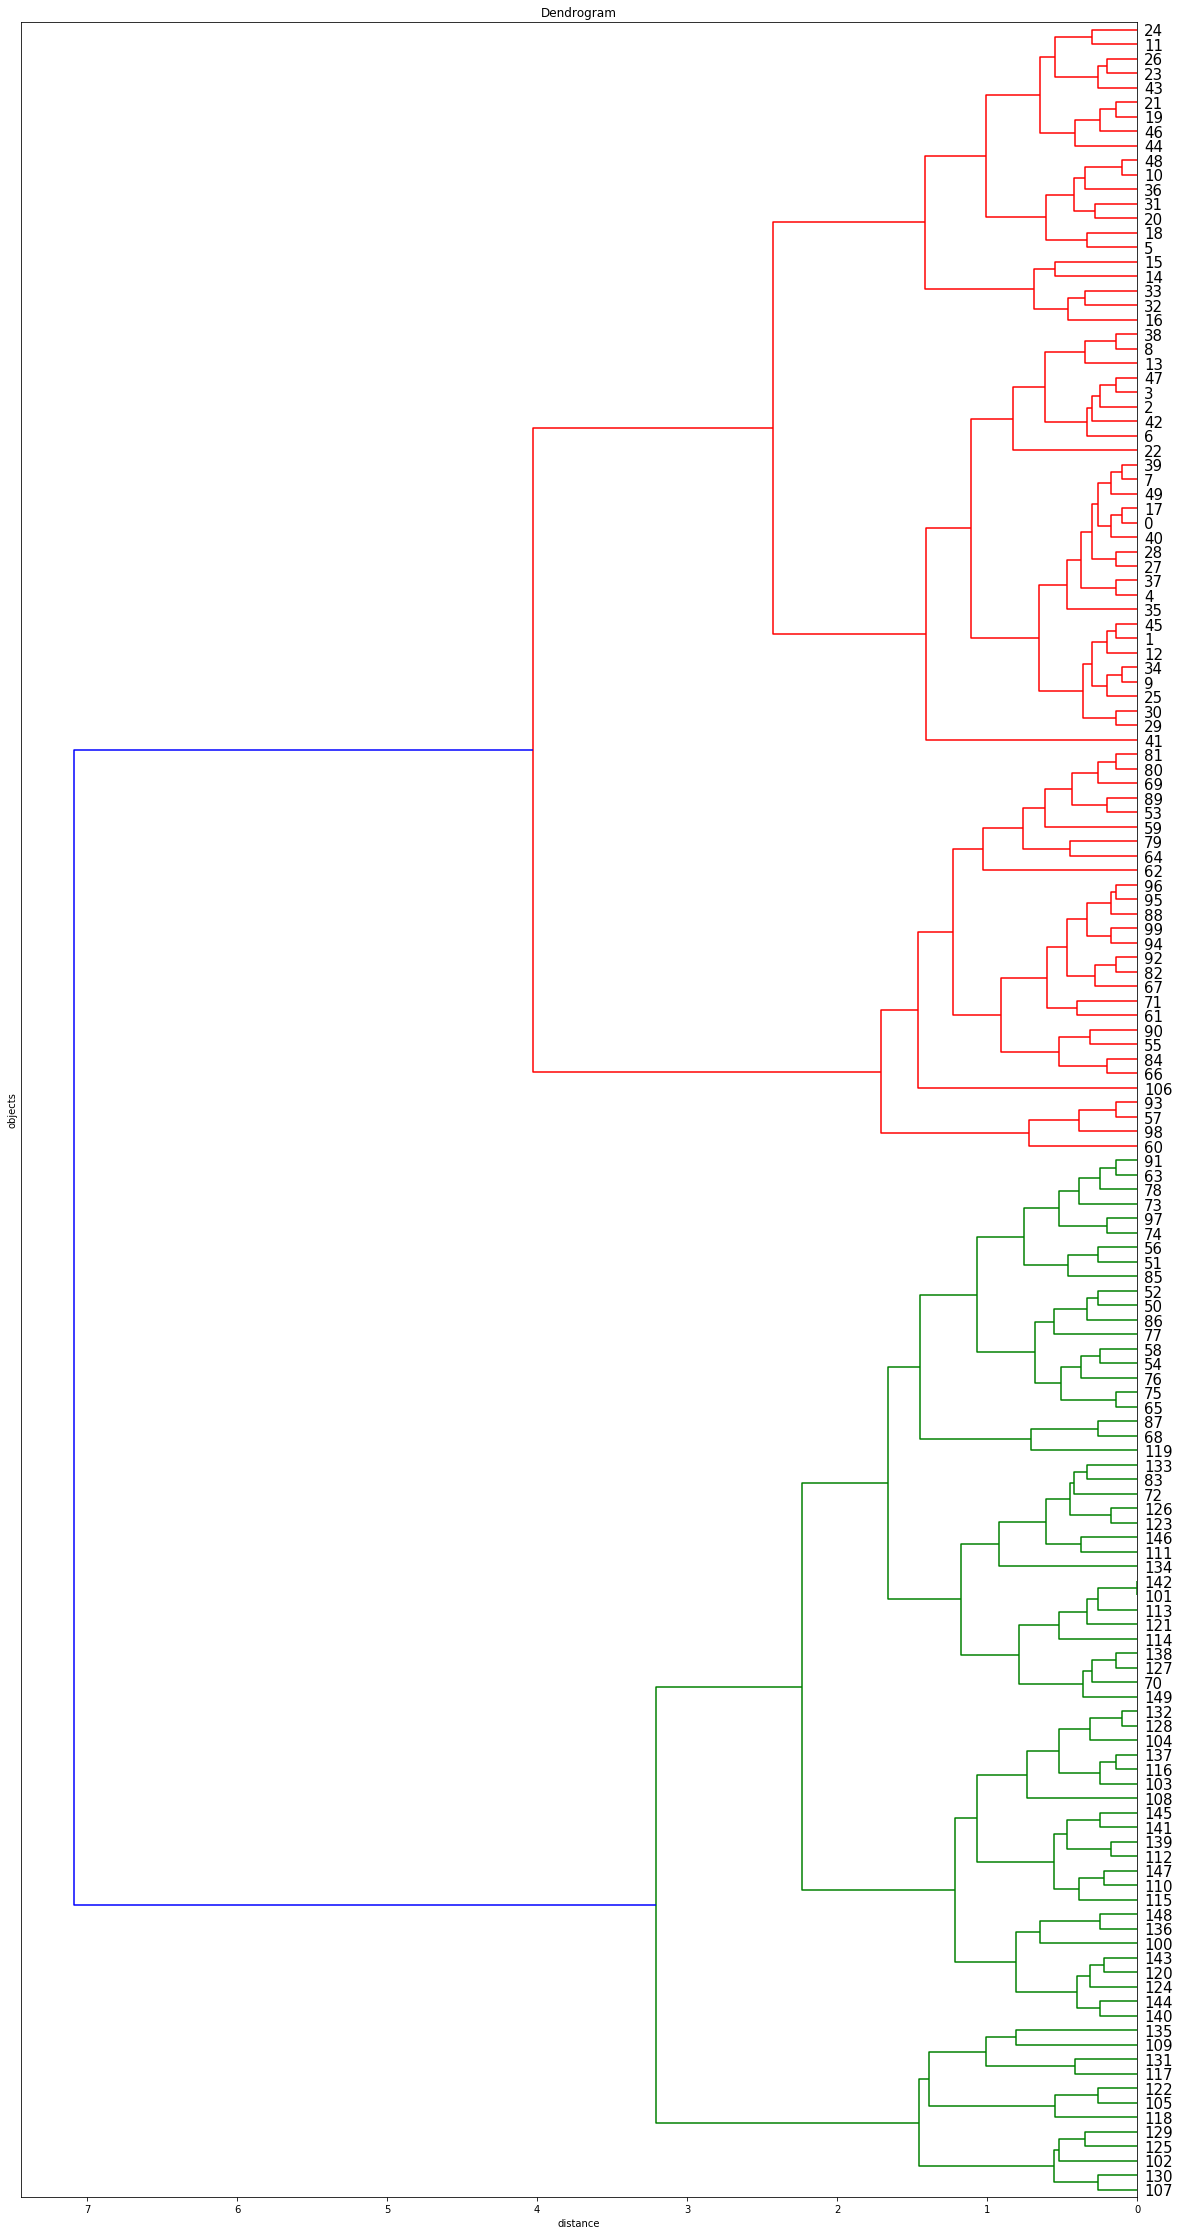

In [6]:
# draw the dendrogram using Z

fig = plt.figure(figsize=(20, 40))
dendro = sch.dendrogram(Z, orientation='left', leaf_rotation=0, leaf_font_size=15)
# in blue: nodes with a merging distance >= 0.7 * maximal merging distance

plt.title('Dendrogram')
plt.ylabel('objects')
plt.xlabel('distance');

# TO LOOK AT THE DENDROGRAM, CHANGE THE OUTPUT CELL VIEW:
# Single click in the left margin of the output cell to switch: full view vs. reduced view with scrollbar(s).
# In reduced view mode, double click in the output cell to zoom in/out (works only for some graphics like dendrograms).
# Double click in the left margin of the output cell to hide/show the output cell.

#plt.savefig('dendrogram.pdf') # to generate a pdf

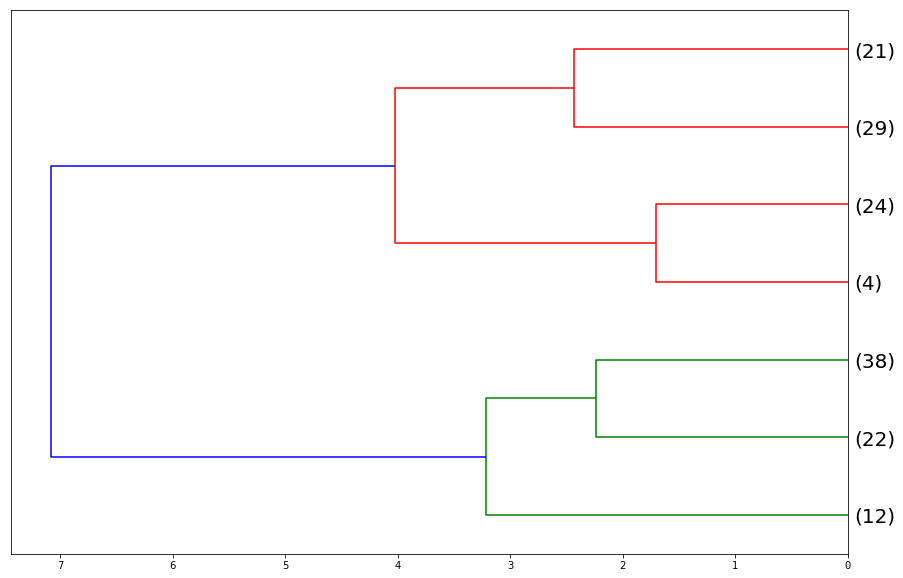

In [7]:
# View only the upper part of the tree, setting p= number of non-singleton branches
fig = plt.figure(figsize=(15, 10))
dendro = sch.dendrogram(Z, orientation='left', p=7, truncate_mode='lastp',
                        show_leaf_counts=True, leaf_rotation=0, leaf_font_size=20)

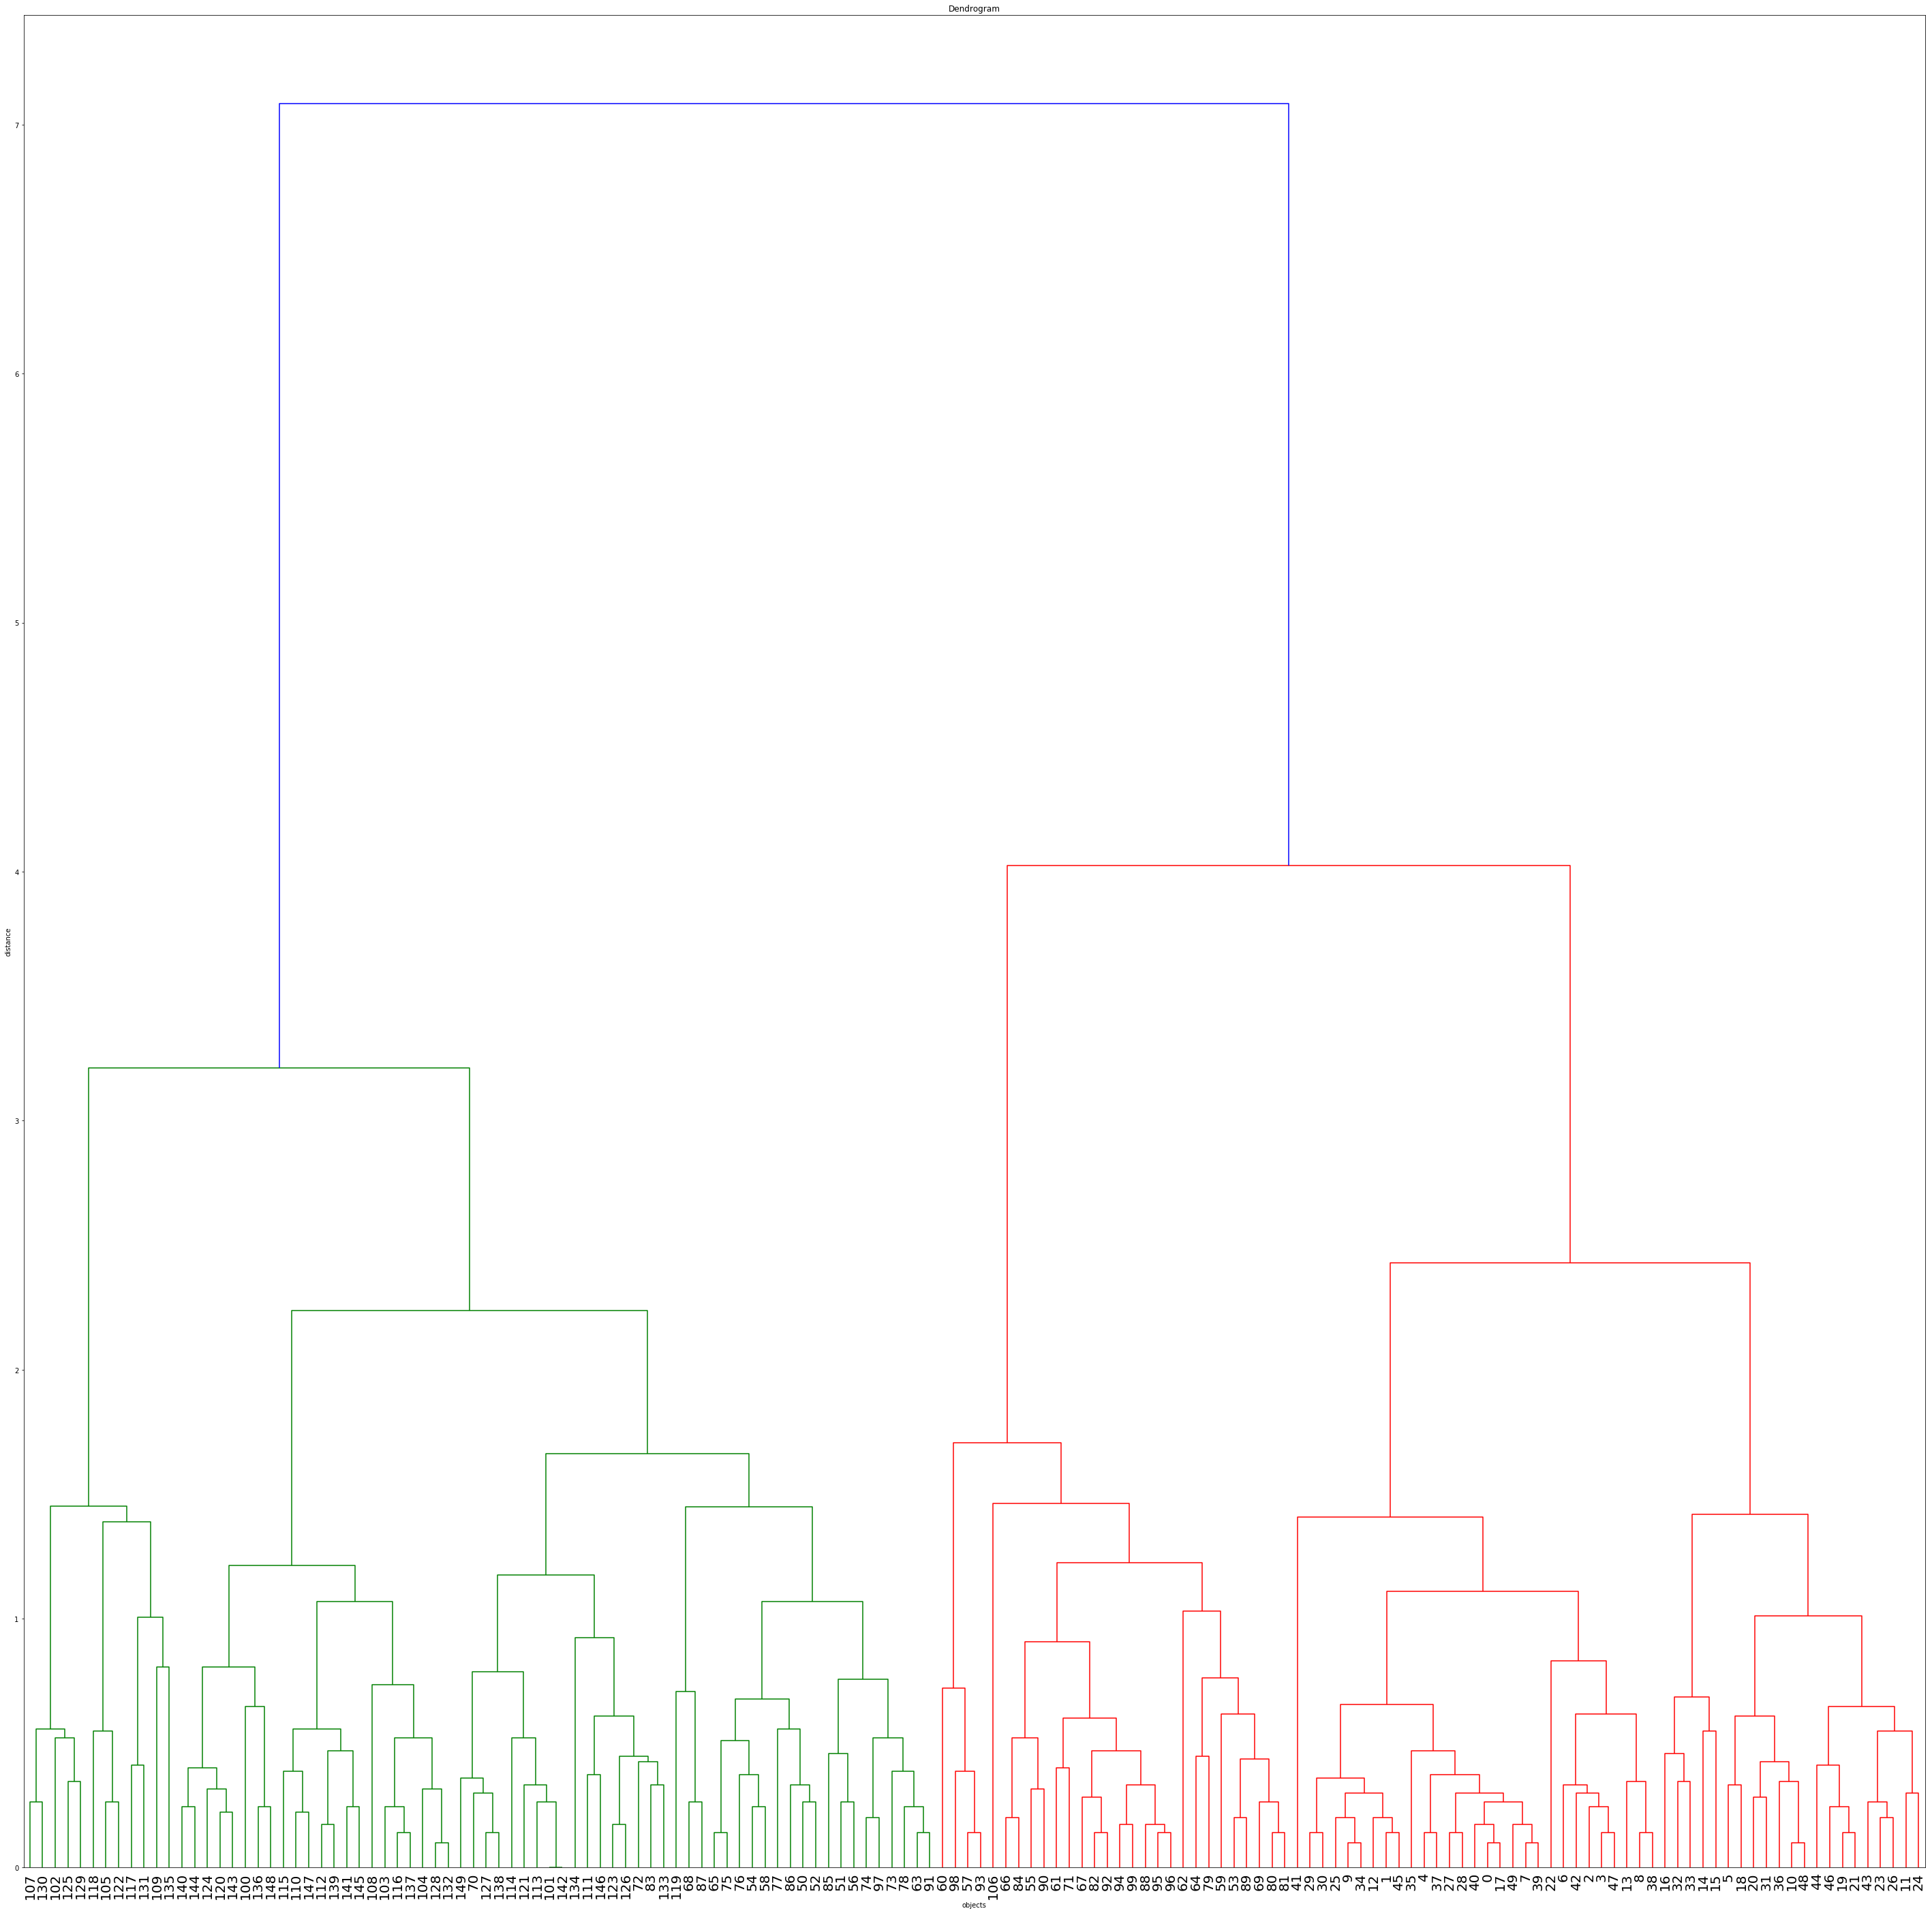

In [8]:
# Change orientation
fig = plt.figure(figsize=(50, 50))
dendro = sch.dendrogram(Z, orientation='top', leaf_rotation=90, leaf_font_size=20)
plt.title('Dendrogram')
plt.xlabel('objects')
plt.ylabel('distance');

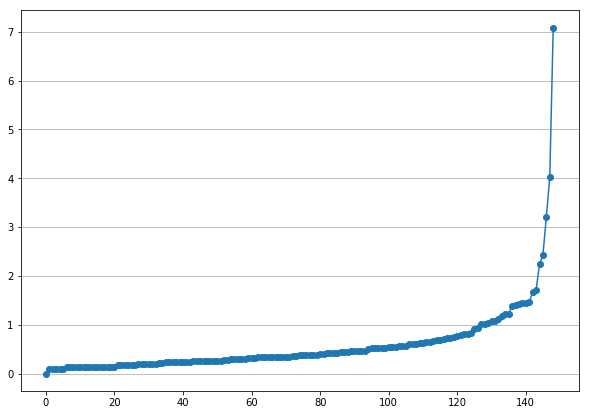

In [9]:
# Draw the grouping distance curve using the grouping distances in Z
fig = plt.figure(figsize=(10, 7))
plt.plot(Z[:,2],'o-')
plt.grid(axis='y')
#plt.savefig('distance_curve.pdf') # to generate a pdf

chaque point correspond a une fusion - 150 points - 150 fusions
abscisses - nombre de points
à l'ordonnée - la distance entre les points fusionnés

In [10]:
# Compute the cluster labels by cutting the dendrogram in order to
# obtain a given number of clusters
nb_clust = 3 # number of clusters
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
print(clusters)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [11]:
# Another way to compute clusters is by cutting the dendrogram at a given distance level
distance_threshold = 2 # cutting distance in the dendrogram
clusters_distance_based = sch.fcluster(Z, distance_threshold, criterion='distance')
print(clusters_distance_based)

[5 5 5 5 5 6 5 5 5 5 6 6 5 5 6 6 6 5 6 6 6 6 5 6 6 5 6 5 5 5 5 6 6 6 5 5 6
 5 5 5 5 5 5 6 6 5 6 5 6 5 3 3 3 4 3 4 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 2 3 1 2 2 1 4 1 2 1 2
 3 2 3 3 2 2 1 1 3 2 3 1 3 2 1 3 3 2 1 1 1 2 3 3 1 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


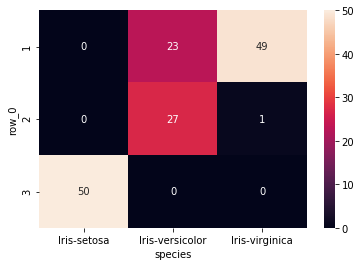

In [12]:
# Contingency table of species vs cluster labels
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

# Data Manipulations and cluster views in 2D projections

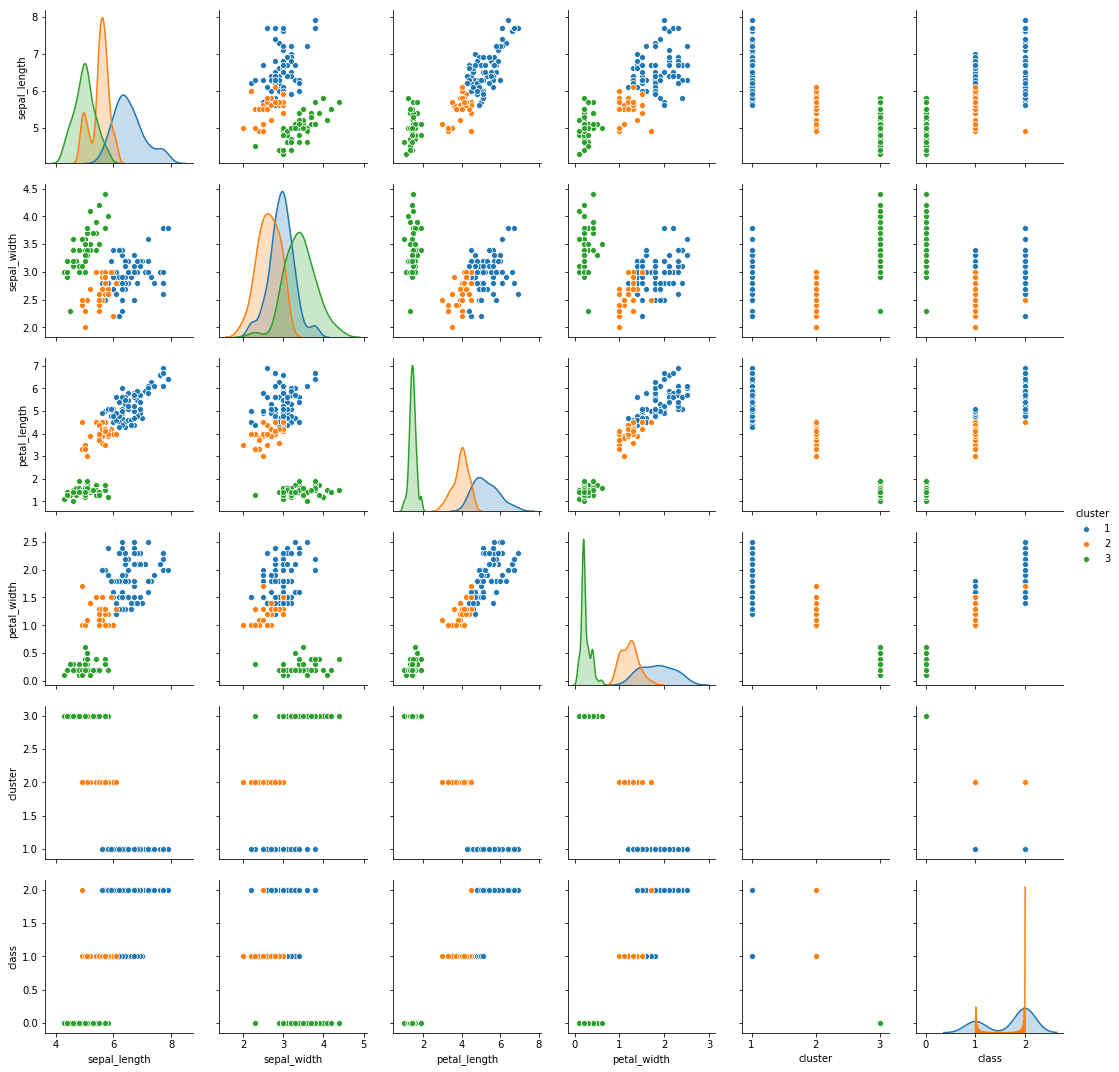

In [15]:
df_all = objects.copy()
df_all['cluster']= clusters
df_all['class']= classes.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
sns.pairplot(data=df_all,hue='cluster')

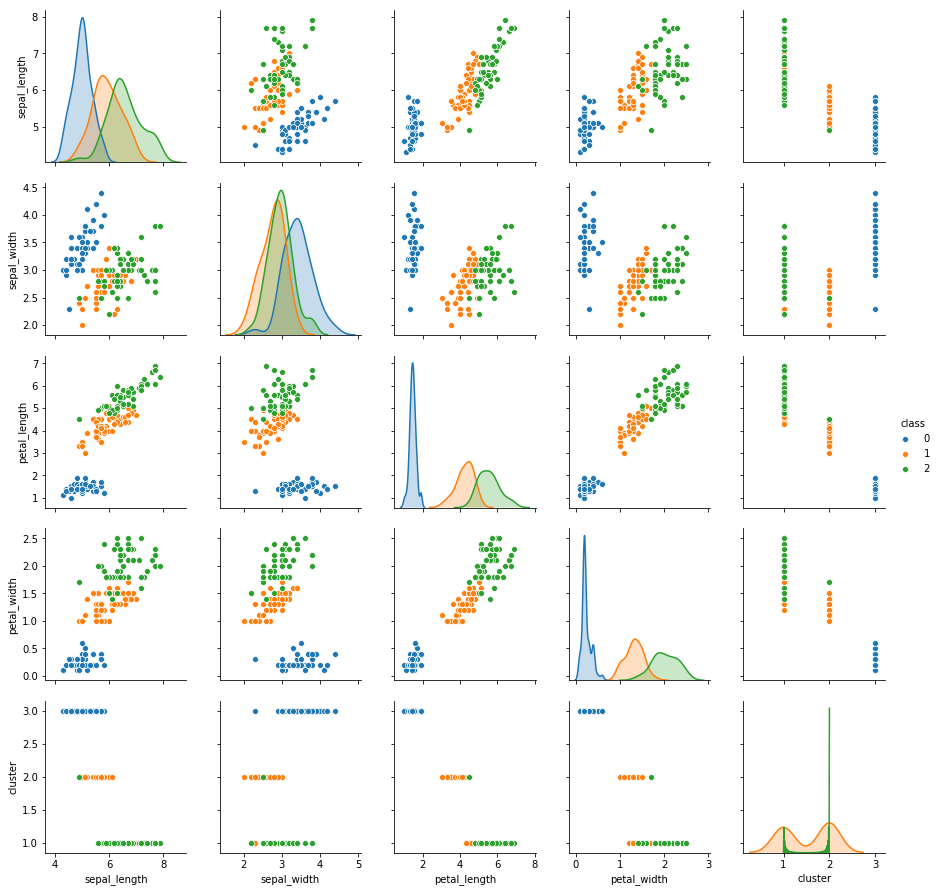

In [14]:
# View the classes in the 2D projections along the other dimensions
sns.pairplot(data=df_all, vars=df_all.columns[0:5], hue="class")